## CLASIFICACION MULTICLASE
Predecir la columna especie del dataset penguins

## Codificar entrada con OneHotEncoder
Para la entrada (x) se utiliza get_dummies o OneHotEncoder

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [22]:
df = sns.load_dataset('penguins')# no nesecidad de cargar CSV (csv_dataset)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [23]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

numeric_cols  = df.select_dtypes(include = np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = IterativeImputer(random_state=42).fit_transform(df[numeric_cols])
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

df.isnull().sum()

NameError: name 'np' is not defined

## Codificar categóricos
 
* species
* sland
* sex

LabelEncoder y OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# equivalente a pd.get_dummies drop_first=True
categoricals = df[['island', 'sex']]
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
categorials_encoded = onehot_encoder.fit_transform(categoricals)

# Obtener los nuevos nombres de las nuevas columnas generadas: 'island_Dream', 'island_Torgersen', 'sex_Male'
column_names = onehot_encoder.get_feature_names_out(categoricals.columns)

# Crear nuevo DataFrame con las nuevas columnas codificadas
df_categoricals = pd.DataFrame(categorials_encoded, columns=column_names)
df_categoricals.head(2)

c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,island_Dream,island_Torgersen,sex_Male,sex_nan
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0


In [ ]:
df = pd.concat([df, df_categoricals], axis=1)
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,sex_Male,sex_nan
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,1.0,1.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,1.0,0.0,0.0


## Codificar Salida con LabelEncoder

Equivalente a .map()de Pandas

Codificar salida (y) con LabelEncoder. En la misma columna genera los valores numericos uno por cad valor categorico : 0,1,2,3....

In [44]:
from sklearn.preprocessing import LabelEncoder

# Codificar la variable de salida con LabelEncoder, valores: 0, 1, 2 todos en la misma columna
label_encoder = LabelEncoder()
df['species_int'] = label_encoder.fit_transform(df['species'])
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_int
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0


## Particionamiento de Datos


In [45]:
X = df.drop(['species', 'species_int', 'island', 'sex'], axis=1)
y = df['species_int']

## EDAs

<Axes: >

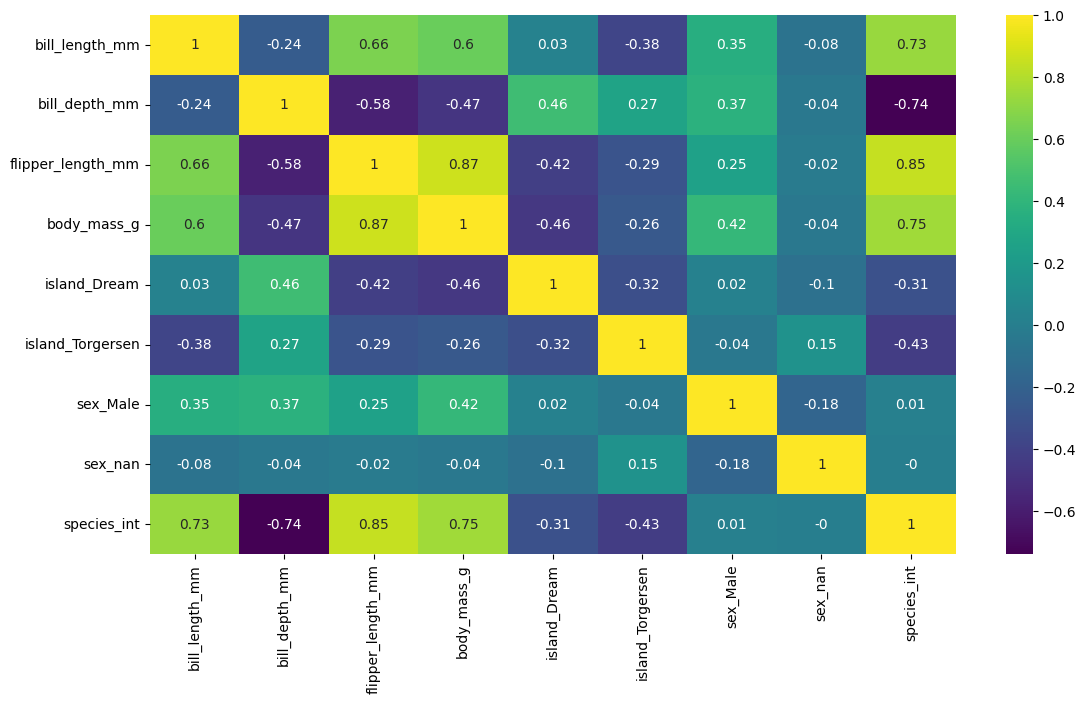

In [ ]:
plt.figure(figsize=(13,7))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

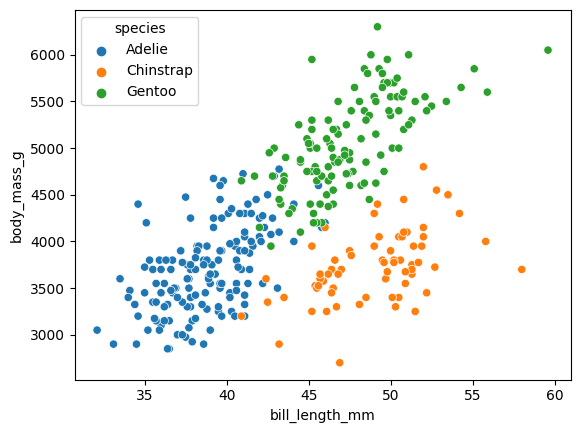

In [ ]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')

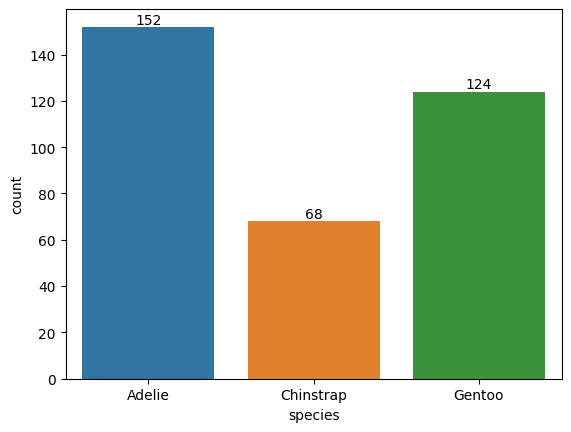

In [31]:
ax = sns.countplot(data=df, x='species')
ax.bar_label(ax.containers[0]);

## Particionamiento de Datos

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [46]:
X = df.drop(['species', 'species_int','island', 'sex'], axis=1)
y = df['species_int']

## Modelado

Regresion Logistica

In [47]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [52]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=  LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_train

118    0
289    2
193    1
5      0
210    1
      ..
188    1
71     0
106    0
270    2
102    0
Name: species_int, Length: 309, dtype: int32

## KNeighborClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_error = []
f1_error = []

for k in range(1, 50): # itera los números impares
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    accuracy_error.append(error)

    f1 = f1_score(y_test, y_pred, average='weighted') # Clasificación multiclase requiere parámetro average
    error = 1 - f1
    f1_error.append(error)

plt.plot(range(1, 50), accuracy_error, c='b')
plt.plot(range(1, 50), f1_error, c='r')

plt.ylabel('Error')
plt.xlabel('K (n_neighbors)');
        

NameError: name 'KNeighborsClassifier' is not defined

## SVC

In [ ]:
from sklearn.svm import SVC

#model = SVC()
model = SVC (class_weight='balanced')

model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

NameError: name 'X_train_res' is not defined

## Escalado de datos



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()#  la escala de datos de 0a1
# fit_transform: calcula y tranforma los datos
# transform: solo transforma utilizando utilizando los calculos obtenidos en train para que se haga con una prediccion 
# una prediccion sobre los datos transformados de la misma manera con los datos que se entreno
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

NameError: name 'X_train' is not defined